<a href="https://colab.research.google.com/github/lumagallacio/python-projects/blob/main/Superhero%20Name%20Generator%20with%20TensorFlow/Superhero_Name_Generator_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero (and Supervillain) Name Generator

We are going to create a model that will predict the character for a given sequence. We will give for our trainned model a seed input, this can be a single character or a sequence. So the model will generate the next character. It will predict the next character in that sequence. This character is added to the seed input to create a new input, wich is then used again to generate the next character and soon.

This project uses TensorFlow and Google Colab. We will understand how use TensorFlow framework to start performing natural language processing tasks like text classification, text generation.

---

[Superhero Names Dataset](https://github.com/am1tyadav/superhero)

## Task 2

1. Import the data
2. Create a tokenizer
3. Char to index and Index to char dictionaries

In [47]:
!git clone https://github.com/am1tyadav/superhero

fatal: destination path 'superhero' already exists and is not an empty directory.


In [48]:
with open('/content/superhero/superheroes.txt', 'r') as f:
  data = f.read()

data[:100] #print firts 10 character
# \n is a new line character
# \t is a tab and indicates the end of the name

'jumpa\t\ndoctor fate\t\nstarlight\t\nisildur\t\nlasher\t\nvarvara\t\nthe target\t\naxel\t\nbattra\t\nchangeling\t\npyrrh'

for train our model with this data, we cannot feed the characters, we have to tokennize them. What means that we have to create a numeric representation for our characters.

In [49]:
import tensorflow as tf
print(tf.__version__)

2.3.0


we need specify filters because we want to keep the tab character in our examples. Bur we are filtering all the other symbols that we don't want to use in our vocabulary.

In [50]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~',
    split='\n',
)

after fit our data, it's able to convert sequence of characters to sequence of number. 

In [51]:
tokenizer.fit_on_texts(data)

two dictionary. Firts transform characters to indices, it's important because neural network model does not understand characters but it does understand numbers

In [52]:
char_to_index = tokenizer.word_index #characters to indices

index_to_char = dict((v,k) for k,v in char_to_index.items()) #indices to characters

print(index_to_char)

{1: '\t', 2: 'a', 3: 'e', 4: 'r', 5: 'o', 6: 'n', 7: 'i', 8: ' ', 9: 't', 10: 's', 11: 'l', 12: 'm', 13: 'h', 14: 'd', 15: 'c', 16: 'u', 17: 'g', 18: 'k', 19: 'b', 20: 'p', 21: 'y', 22: 'w', 23: 'f', 24: 'v', 25: 'j', 26: 'z', 27: 'x', 28: 'q'}


## Task 3

1. Converting between names and sequences

the predictions of our model are going to be sequences of number, so we need to convert again, using the dictionaries that we created in the previous task, to names. So we want to see our predictions converted to names.

Let's take a look at all the names

In [53]:
names = data.splitlines() #returns a list with all the lines in string using \n 
names[:10]

['jumpa\t',
 'doctor fate\t',
 'starlight\t',
 'isildur\t',
 'lasher\t',
 'varvara\t',
 'the target\t',
 'axel\t',
 'battra\t',
 'changeling\t']

to convert char to number we just need to use the tokenizer

In [54]:
tokenizer.texts_to_sequences(names[0]) # just pass "jumpa" name

[[25], [16], [12], [20], [2], [1]]

we will create a function to do this

In [55]:
def name_to_seq(name):
  return [tokenizer.texts_to_sequences(c)[0][0] for c in name]

In [56]:
name_to_seq(names[0])

[25, 16, 12, 20, 2, 1]

we need to do the oposite

0 is not defined. We look ate the caracter value associated with the index anf then joined to create a name

In [57]:
def seq_to_name(seq):
  return ''.join([index_to_char[i] for i in seq if i !=0]) 

In [58]:
seq_to_name(name_to_seq(names[0]))

'jumpa\t'

## Task 4

1. Creating sequences
2. Padding all sequences

we will create sequences (of numbers). these sequences are essentially all the examples from all the names that we have in our dataset. So let's create a list of sequences.

For example, the name "jumpa\t", we can split that to J and U where J will be the input example and U is going to be the label. We are asking to the model that, hey if you see a sequence with just J in it, then predict U. But the sequences can be longer, but at least they need to be two characters long. So we're starting with two, and then will be three in the next iteration, so our example will  become JUM and will be added to sequences. And then we will have JUMP and than JUMPA, JUMPA\t

In [59]:
sequence1=[]
seq = name_to_seq(names[0])
if len(seq)>=2: #each example with at least two characters 
  sequence1 += [seq[:i] for i in range(2, len(seq)+1)]
sequence1

[[25, 16],
 [25, 16, 12],
 [25, 16, 12, 20],
 [25, 16, 12, 20, 2],
 [25, 16, 12, 20, 2, 1]]

In [60]:
sequences = []

for name in names:
  seq = name_to_seq(name)
  if len(seq)>=2: #each example with at least two characters 
    sequences += [seq[:i] for i in range(2, len(seq)+1)]
sequences[:10]  

[[25, 16],
 [25, 16, 12],
 [25, 16, 12, 20],
 [25, 16, 12, 20, 2],
 [25, 16, 12, 20, 2, 1],
 [14, 5],
 [14, 5, 15],
 [14, 5, 15, 9],
 [14, 5, 15, 9, 5],
 [14, 5, 15, 9, 5, 4]]

We also need to know what is the maximum length of our examples. So why do we want to know that? 

because we will not have a variable length input to our model. We will have a fixed length and one way to making these sequences before fit in the model, wich expects a fixed length is to simply put zeros, which does not really mean anything, it just means ignored.  So let's calculate the maximum length

In [61]:
max_len = max([len(x) for x in sequences])
print(max_len)

33


So these sequences can be padded with zero. So all our sequences are going to be 33 of length. In the first example You can see all zeros an in the end we have 25 and 16, we use pedding pre because is more easier for us to create labels, all we have to do now is split each example in two, so the last character is always going to be the label and the sequences os number until that last character is goingo to be our example.

In [62]:
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(
    sequences, 
    padding='pre',
    maxlen=max_len
)
print(padded_sequences[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 25 16]


In [63]:
padded_sequences.shape

(88279, 33)

## Task 5: Creating Training and Validation Sets

1. Creating training and validation sets

We have to split our data in examples and labels

In [64]:
x, y = padded_sequences[:,:-1], padded_sequences[:, -1] # all the values not including the last one, and just the last one value
print(x.shape, y.shape)

(88279, 32) (88279,)



Let's use sklearn for create training and validation sets



In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(66209, 32) (66209,)
(22070, 32) (22070,)


Let's take a look at the size os the vocabulary.

In [67]:
num_chars = len(char_to_index.keys())+1 # we need to add 1 because we added a zero to ou vocabulary
num_chars

29

## Task 6: Creating the Model

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D,MaxPooling1D, LSTM
from tensorflow.keras.layers import Bidirectional, Dense

model = Sequential([
                    Embedding(num_chars, 8, input_length=max_len-1),
                    Conv1D(64, 5, strides=1, activation='tanh', padding='causal'),
                    MaxPooling1D(2),
                    LSTM(32),
                    Dense(num_chars, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 32, 8)             232       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 32, 64)            2624      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_9 (Dense)              (None, 29)                957       
Total params: 16,229
Trainable params: 16,229
Non-trainable params: 0
_________________________________________________________________


## Task 7: Training the Model

The model that we have created is pretty small so it will be pretty fast to train

In [69]:
h = model.fit(x_train, y_train,
              validation_data=(x_test, y_test),
              epochs=50, verbose=2,
              callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
              )

Epoch 1/50
2070/2070 - 10s - loss: 2.7302 - accuracy: 0.1934 - val_loss: 2.5770 - val_accuracy: 0.2250
Epoch 2/50
2070/2070 - 10s - loss: 2.5240 - accuracy: 0.2411 - val_loss: 2.4953 - val_accuracy: 0.2512
Epoch 3/50
2070/2070 - 10s - loss: 2.4596 - accuracy: 0.2589 - val_loss: 2.4499 - val_accuracy: 0.2623
Epoch 4/50
2070/2070 - 10s - loss: 2.4164 - accuracy: 0.2696 - val_loss: 2.4130 - val_accuracy: 0.2729
Epoch 5/50
2070/2070 - 10s - loss: 2.3804 - accuracy: 0.2794 - val_loss: 2.3917 - val_accuracy: 0.2757
Epoch 6/50
2070/2070 - 10s - loss: 2.3495 - accuracy: 0.2893 - val_loss: 2.3614 - val_accuracy: 0.2879
Epoch 7/50
2070/2070 - 10s - loss: 2.3214 - accuracy: 0.2960 - val_loss: 2.3404 - val_accuracy: 0.2983
Epoch 8/50
2070/2070 - 10s - loss: 2.2967 - accuracy: 0.3059 - val_loss: 2.3277 - val_accuracy: 0.3023
Epoch 9/50
2070/2070 - 10s - loss: 2.2749 - accuracy: 0.3103 - val_loss: 2.3105 - val_accuracy: 0.3071
Epoch 10/50
2070/2070 - 10s - loss: 2.2540 - accuracy: 0.3168 - val_loss:

The training for me run for 41 epochs and i got 35% validation accuracy

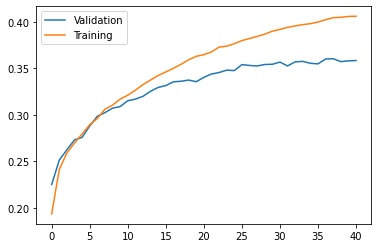

In [73]:
from matplotlib import  pyplot as plt

epochs_ran = len(h.history['loss'])

plt.plot(range(0, epochs_ran), h.history['val_accuracy'], label= 'Validation')
plt.plot(range(0, epochs_ran), h.history['accuracy'], label= 'Training')
plt.legend()
plt.show()

## Task 8: Generate Names!

seed could be a single character or a sequence of characters

In [82]:
def generate_names(seed):
    for i in range(0,40):
      seq = name_to_seq(seed)
      padded = tf.keras.preprocessing.sequence.pad_sequences([seq], 
                                                             padding='pre', 
                                                             maxlen=max_len-1,
                                                             truncating='pre')
      pred = model.predict(padded)[0]
      pred_char = index_to_char[tf.argmax(pred).numpy()]
      seed += pred_char

      if pred_char == '\t':
        break
    print(seed) 

In [95]:
generate_names('peter')

peter mariu	
